In [25]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [54]:
# Model 2a: 1 predator, 2 prey without carrying capacity

# x1 = population density for prey 1
# x2 = population density for prey 2
# y = population density for predator

# Initializing parameters
a1 = 0.25 # prey 1 growth rate
a2 = 0.25 # prey 2 growth rate
b = 0.01 # predator kill rate
c = 0.1 # predator death rate
d1 = 0.01 # predator growth rate from eating prey 1
d2 = 0.005 #predator growth rate from eating prey 2

# Defining Lotka-Volterra differential equations
def dSdt1(S, t):
    x1, x2, y = S
    return [a1*x1 - b*x1*y,
            a2*x2 - b*x2*y,
            -c*y + d1*x1*y +d2*x2*y 
           ]

In [56]:
# Comparing ODE

# Initializing population densities
x10 = 200
x20 = 150
y0 = 50
S0 = (x10, x20, y0)

t = np.linspace(0, 300, 1000) # time array

# SciPy ODEint Solver
sol1 = odeint(dSdt1, S0, t)

sol1_x1 = sol1[:, 0] # prey 1 population over time
sol1_x2 = sol1[:, 1] # prey 2 population over time
sol1_y = sol1[:, 2] # predator population over time

# Runge-Kutta ODE Solver
def odeSolver(S0, dSdt, total_time, time_steps):
    """
    Solves a system of ODEs using the "RK4" Runge-Kutta method

    Parameters:
        S0: (list) representing all initial populations
        dSdt: function representing the system of ODEs
            -takes current populations and time as parameters
            -returns a list describing the LV derivative equations 
        total_time: (float) total time frame for which the ODE is solved in
        time_steps: (int) number of time points over total_time interval

    Returns:
        S: (NumPy array) array of shape (n, time_steps) containing the population values at each time step
            -n = number of variables
        t: (NumPy array) array containing time points corresponding to the time steps from 0 to total_time
    """
    n = len(S0) # number of variables
    S = np.zeros((n, time_steps)) # solution array
    t = np.linspace(0, total_time, time_steps) # time array
    h = t[1] - t[0] # time step size

    # Defining initial values
    for i in range(n):
        S[i, 0] = S0[i]

    # Implementing Runge-Kutta equations
    for i in range(time_steps - 1):
        k1 = np.array(dSdt(S[:, i], t[i]))
        k2 = np.array(dSdt(S[:, i] + h/2 * k1, t[i] + h/2))
        k3 = np.array(dSdt(S[:, i] + h/2 * k2, t[i] + h/2))
        k4 = np.array(dSdt(S[:, i] + h * k3, t[i] + h))
        
        S[:, i + 1] = S[:, i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return S, t

S, t = odeSolver(S0, dSdt1, 300, 1000)

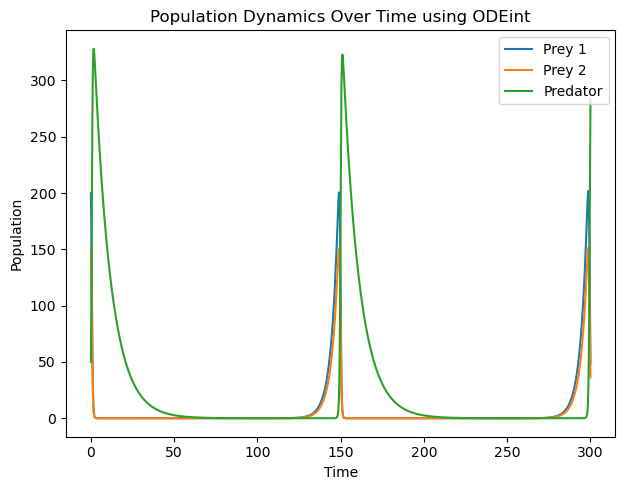

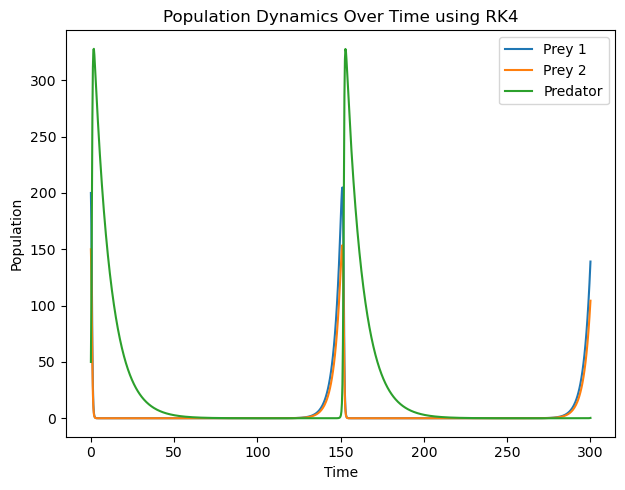

In [58]:
# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, sol1_x1, label = "Prey 1")
plt.plot(t, sol1_x2, label = "Prey 2")
plt.plot(t, sol1_y, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey 1")
plt.plot(t, S[1], label = "Prey 2")
plt.plot(t, S[2], label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4")
plt.tight_layout()
plt.show()

In [60]:
# Model 2b: 1 predator, 2 prey with carrying capacity

# Initializing parameters
k1 = 200 # carrying capacity of prey 1 population
k2 = 100 # carrying capacity of prey 2 population
k3 = 50 # carrying capacity of predator population

# Defining Lotka-Volterra differential equations
def dSdt2(S, t):
    x1, x2, y = S
    return [a1*x1*(1-x1/k1) - b*x1*y,
            a2*x2*(1-x2/k2) - b*x2*y,
            -c*y + d1*x1*y*(1-y/k3) + d2*x2*y*(1-y/k3) # using geometric mean of x1 and x2
           ]

# Initializing population densities
x10 = 200
x20 = 150
y0 = 50
S0 = (x10, x20, y0)

t = np.linspace(0, 300, 1000) # time array

# SciPy ODEint Solver
sol2 = odeint(dSdt2, S0, t)

sol2_x1 = sol2[:, 0] # prey 1 population over time
sol2_x2 = sol2[:, 1] # prey 2 population over time
sol2_y = sol2[:, 2] # predator population over time

In [62]:
# Runge-Kutta ODE Solver
S, t = odeSolver(S0, dSdt2, 300, 1000)

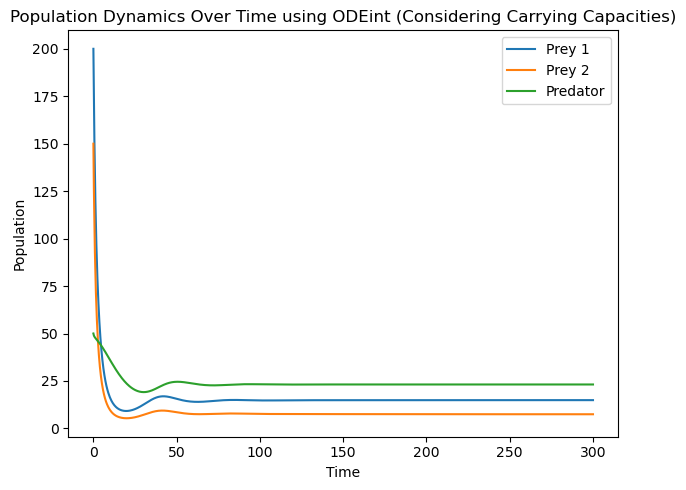

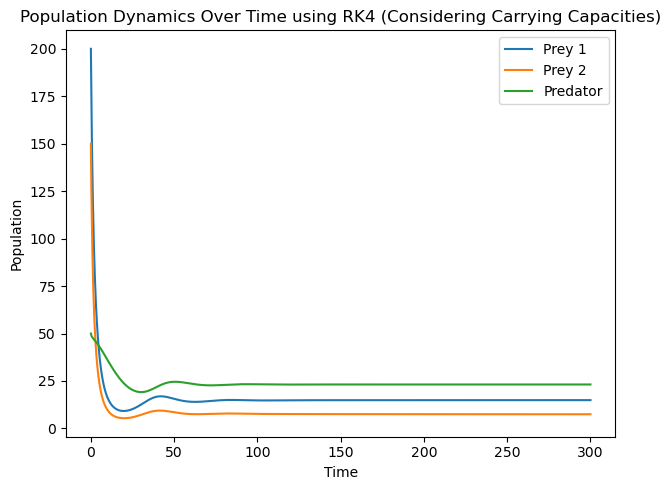

In [64]:
# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, sol2_x1, label = "Prey 1")
plt.plot(t, sol2_x2, label = "Prey 2")
plt.plot(t, sol2_y, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint (Considering Carrying Capacities)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey 1")
plt.plot(t, S[1], label = "Prey 2")
plt.plot(t, S[2], label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4 (Considering Carrying Capacities)")
plt.tight_layout()
plt.show()